In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend


In [2]:
mm = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\my_movies.csv")
mm.head()


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
mdf=pd.get_dummies(mm)
mdf.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# for min support = 0.1

In [21]:
frequent_itemsets = apriori(mdf, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po..."
1393,0.1,"(Green Mile, V2_LOTR1, V4_Green Mile, LOTR2, S..."
1394,0.1,"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po..."
1395,0.1,"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po..."


In [7]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR1, V1_Sixth Sense)","(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(LOTR1, V5_LOTR2)","(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V2_LOTR1),"(Green Mile, V4_Green Mile, Harry Potter1, LOT...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V3_Harry Potter1),"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(V3_Harry Potter1),"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V1_Sixth Sense),"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V5_LOTR2),"(Green Mile, V2_LOTR1, V4_Green Mile, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [7]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, V5_LOTR2, Green Mile, V3_Harry...","(Sixth Sense, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(V2_LOTR1, V5_LOTR2, Harry Potter1)","(Sixth Sense, V4_Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V2_LOTR1, V4_Green Mile, V5_LOTR2)","(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, V5_LOTR2, Harry Potter1)","(Sixth Sense, V2_LOTR1, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V4_Green Mile, V5_LOTR2, LOTR2)","(Sixth Sense, V2_LOTR1, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, V4_Green Mile, Harry Potter1)","(Sixth Sense, LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, V4_Green Mile, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V4_Green Mile, Harry Potter1, LOTR2)","(Sixth Sense, V2_LOTR1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Sixth Sense, LOTR1, V5_LOTR2)","(V2_LOTR1, V4_Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, V2_LOTR1, LOTR1)","(V4_Green Mile, V5_LOTR2, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(Sixth Sense, V2_LOTR1, LOTR2, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(Sixth Sense, V2_LOTR1, LOTR2, V4_Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(Green Mile),"(Sixth Sense, V2_LOTR1, LOTR2, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR1),"(Sixth Sense, V2_LOTR1, LOTR2, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


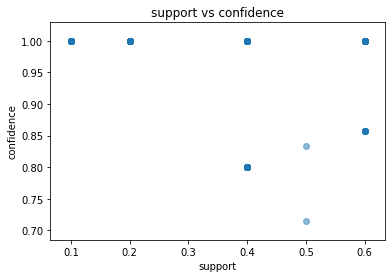

In [14]:
# support vs confidence
plt.scatter (rules['support'],rules['confidence'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

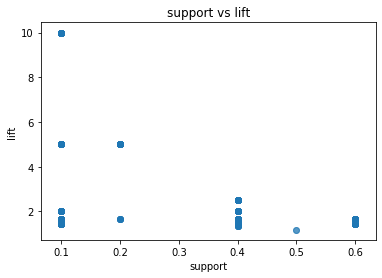

In [15]:
# support vs lift
plt.scatter (rules['support'],rules['lift'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('lift')
plt.title('support vs lift')
plt.show()

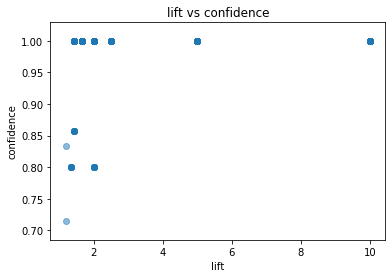

In [16]:
# lift vs confidence
plt.scatter (rules['lift'],rules['confidence'], alpha = 0.5)
plt.xlabel ('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


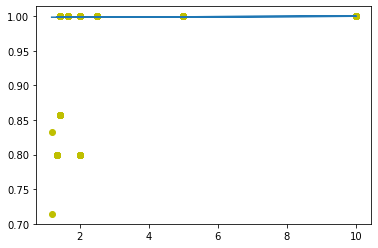

In [19]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'],rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

# for min support = 0.5

In [22]:
frequent_itemsets1 = apriori(mdf, min_support=0.5, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [28]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [29]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(Patriot, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [30]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


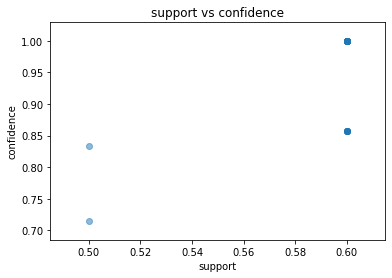

In [31]:
# support vs confidence
plt.scatter (rules1['support'],rules1['confidence'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

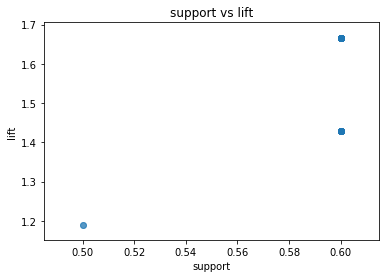

In [32]:
# support vs lift
plt.scatter (rules1['support'],rules1['lift'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('lift')
plt.title('support vs lift')
plt.show()

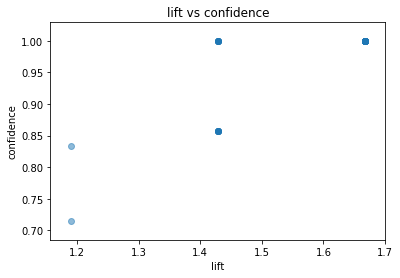

In [34]:
# lift vs confidence
plt.scatter (rules1['lift'],rules1['confidence'], alpha = 0.5)
plt.xlabel ('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


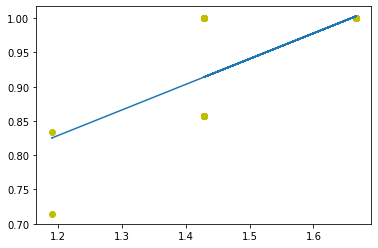

In [36]:
import numpy as np
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'],rules1['confidence'], 'yo', rules1['lift'], fit_fn(rules1['lift']))